In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
print(tf.__version__)

2.0.0-alpha0


In [3]:
data = pd.read_csv('completo+respuesta+headers.csv', header=0, index_col=False)

In [4]:
data.describe()

,X-axis,Y-axis,Z-axis,Label
count,19337.000000,19337.000000,19337.000000,19337.000000
mean,-3.036879,-3.869599,4.779501,1.413456
std,7.213168,8.843972,6.318493,1.108777
min,-78.437500,-78.437500,-57.375000,0.000000
25%,-7.925781,-4.355469,0.378174,0.000000
50%,-0.445312,-1.120117,3.107422,1.000000
75%,-0.067017,-0.351807,10.351562,2.000000
max,72.937500,78.437500,78.437500,3.000000


In [5]:
x_st=data['X-axis'] #(data['X-axis']-data['X-axis'].mean())/data['X-axis'].std()
y_st=data['Y-axis'] #(data['Y-axis']-data['Y-axis'].mean())/data['Y-axis'].std()
z_st=data['Z-axis'] #(data['Z-axis']-data['Z-axis'].mean())/data['Z-axis'].std()

In [6]:
columns=['X-axis', 'Y-axis', 'Z-axis', 'Label']
data_st = pd.concat([x_st, y_st, z_st, data['Label']], axis=1, keys=columns)
data_x= pd.concat([x_st, y_st, z_st], axis=1, keys=['X-axis', 'Y-axis', 'Z-axis'])

In [7]:

data_st.describe()

,X-axis,Y-axis,Z-axis,Label
count,19337.000000,19337.000000,19337.000000,19337.000000
mean,-3.036879,-3.869599,4.779501,1.413456
std,7.213168,8.843972,6.318493,1.108777
min,-78.437500,-78.437500,-57.375000,0.000000
25%,-7.925781,-4.355469,0.378174,0.000000
50%,-0.445312,-1.120117,3.107422,1.000000
75%,-0.067017,-0.351807,10.351562,2.000000
max,72.937500,78.437500,78.437500,3.000000


In [8]:
#Definition of the NN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(30, input_shape=(3,)))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(4, activation=tf.nn.softmax))

#inputs = tf.keras.Input(shape=(3,))
#x = tf.keras.layers.Dense(100, activation=tf.nn.relu)(inputs)
#y = tf.keras.layers.Dense(1000, activation=tf.nn.sigmoid)(x)
#outputs = tf.keras.layers.Dense(4, activation=tf.nn.softmax)(y)
#model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [10]:
x_x = data_x['X-axis'].to_numpy()
x_y = data_x['Y-axis'].to_numpy()
x_z = data_x['Z-axis'].to_numpy()
x_data = data_x.to_numpy()
y_data = data_st['Label'].to_numpy()

In [11]:
(x_data, y_data)

(array([[-0.07421875, -0.3972168 , 10.3203125 ],
        [-0.07897949, -0.40454102, 10.359375  ],
        [-0.07659912, -0.40698242, 10.34375   ],
        ...,
        [-0.5336914 ,  8.109375  ,  2.9609375 ],
        [-1.2128906 ,  8.3359375 ,  1.8291016 ],
        [-0.9404297 ,  9.4453125 ,  4.0976562 ]]),
 array([0, 0, 0, ..., 3, 3, 3], dtype=int64))

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [13]:
x_train, x_test, y_train, y_test = [], [],[], []

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, shuffle=True)

In [15]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [16]:
(x_train, y_train)

(array([[-10.109375  ,  -1.125     ,   3.09375   ],
        [ -0.05264282,  -0.3852539 ,  10.359375  ],
        [-12.234375  ,  -5.4492188 ,   1.5820312 ],
        ...,
        [ -7.8203125 ,  -2.046875  ,   1.3808594 ],
        [ -0.07897949,  -0.36376953,  10.359375  ],
        [ -6.9375    ,  -2.2597656 ,  -0.7011719 ]]), array([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]], dtype=float32))

In [17]:
epoch=10
weights = [1.0, 1.0, 1.0, 1.0]

In [18]:
(y_train, y_test)

(array([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]], dtype=float32), array([[0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        ...,
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]], dtype=float32))

In [19]:
hist=model.fit(
    x=x_train, 
    y=y_train, 
    epochs=epoch,
    batch_size=4,
    validation_data=(x_test, y_test),
    shuffle=False
)

Train on 16436 samples, validate on 2901 samples
Epoch 1/10
16436/16436 [==============================] - 4s 273us/sample - loss: 0.4241 - accuracy: 0.8554 - val_loss: 0.3135 - val_accuracy: 0.8918
Epoch 2/10
16436/16436 [==============================] - 4s 234us/sample - loss: 0.2647 - accuracy: 0.9142 - val_loss: 0.2348 - val_accuracy: 0.9252
Epoch 3/10
16436/16436 [==============================] - 4s 236us/sample - loss: 0.2300 - accuracy: 0.9258 - val_loss: 0.2182 - val_accuracy: 0.9300
Epoch 4/10
16436/16436 [==============================] - 4s 234us/sample - loss: 0.2178 - accuracy: 0.9306 - val_loss: 0.2084 - val_accuracy: 0.93423 - accuracy: 0.93
Epoch 5/10
16436/16436 [==============================] - 4s 236us/sample - loss: 0.2113 - accuracy: 0.9325 - val_loss: 0.2062 - val_accuracy: 0.9328
Epoch 6/10
16436/16436 [==============================] - 4s 240us/sample - loss: 0.2079 - accuracy: 0.9336 - val_loss: 0.2039 - val_accuracy: 0.9331
Epoch 7/10
16436/16436 [=========

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 404       
Total params: 3,624
Trainable params: 3,624
Non-trainable params: 0
_________________________________________________________________


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

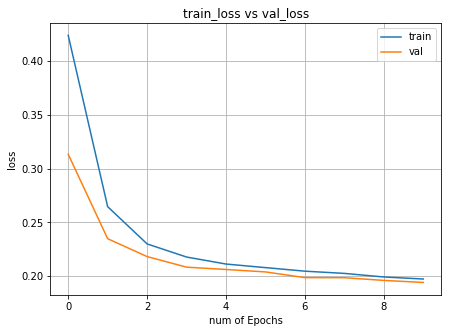

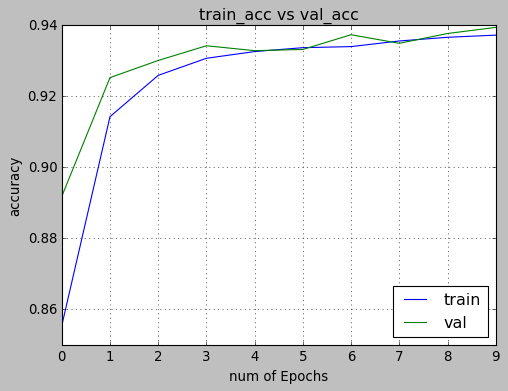

In [21]:
#Some graphics statistics
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)	
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])

#Matriz confusion todo
y_pred = model.predict_classes(x_train)
p=model.predict_proba(x_train)
print(classification_report(np.argmax(x_train,axis=1), y_train,target_names=['R', 'A', 'C', 'F']))
print(confusion_matrix(np.argmax(x_train,axis=1), y_train))

#Matriz de confusion test
y_pred = model.predict_classes(x_test)
p=model.predict_proba(x_test) # to predict probability
print(classification_report(np.argmax(x_test,axis=1), y_test,target_names=['R', 'A', 'C', 'F']))
print(confusion_matrix(np.argmax(x_test,axis=1), y_test))

plt.show()